# General case analysis

In [30]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [31]:

df = pd.read_csv("../data/general/experiment_results.csv")

df_tortuous = df[df['tortosity'] == 'tortuous']
df_moderate = df[df['tortosity'] == 'moderate']
df_simple = df[df['tortosity'] == 'simple']

metrics = ['Dice 3D [%]', 'IoU 3D [%]', 'Chamfer distance 3D [mm]']
df


,Unnamed: 0,vessel,tortosity,Time [s],Dice 3D [%],IoU 3D [%],Chamfer distance 3D [mm],Avg Dice 2D [%]
0,0,simple:0,simple,NaN,79.935795,66.577540,0.622310,0.782404
1,1,simple:1,simple,NaN,80.073801,66.769231,0.794861,0.780162
2,2,simple:2,simple,NaN,80.223881,66.978193,0.687415,0.779014
3,3,simple:3,simple,NaN,77.041602,62.656642,0.965145,0.794032
4,4,simple:4,simple,NaN,81.435257,68.684211,0.600571,0.793187
...,...,...,...,...,...,...,...,...
595,595,tortuous:195,tortuous,NaN,77.867528,63.756614,0.855746,0.795485
596,596,tortuous:196,tortuous,NaN,76.788321,62.322275,0.777721,0.786827
597,597,tortuous:197,tortuous,NaN,80.456026,67.302452,0.626681,0.808386
598,598,tortuous:198,tortuous,NaN,77.688604,63.517060,0.796986,0.798133


In [32]:
df.describe()

,Unnamed: 0,Time [s],Dice 3D [%],IoU 3D [%],Chamfer distance 3D [mm],Avg Dice 2D [%]
count,600.000000,0.0,600.000000,600.000000,600.000000,600.000000
mean,299.500000,NaN,78.168595,64.239130,0.830656,0.786145
std,173.349358,NaN,2.660022,3.573011,0.186328,0.010951
min,0.000000,NaN,69.578313,53.348730,0.458435,0.752399
25%,149.750000,NaN,76.478977,61.915758,0.704340,0.779302
50%,299.500000,NaN,78.247244,64.267328,0.801830,0.786342
75%,449.250000,NaN,80.062678,66.753765,0.943646,0.793527
max,599.000000,NaN,85.846154,75.202156,1.443587,0.815838


In [33]:
def t_student(df1, df2, coeff):
    t, p = stats.ttest_ind(df1[coeff], df2[coeff])
    return t, p

def ci(series, confidence=0.95):
    n = len(series)
    mean = series.mean()
    std_err = stats.sem(series)
    moe = stats.t.ppf((1 + confidence) / 2, df=n - 1) * std_err
    return (mean - moe, mean + moe)

In [34]:
_, p1 = t_student(df_tortuous, df_simple, metrics[2])
_, p2 = t_student(df_tortuous, df_moderate, metrics[2])
_, p3 = t_student(df_simple, df_moderate, metrics[2])
p1, p2, p3

(np.float64(0.011303698561663014),
 np.float64(8.507207412494103e-31),
 np.float64(5.670095333564113e-18))

/var/folders/kn/fg_k6n0119d337lwnvhwnmnw0000gn/T/ipykernel_62396/389818507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tortosity', y='Value', data=df_melted[df_melted['Metric'] == metric], palette='Set1')
/var/folders/kn/fg_k6n0119d337lwnvhwnmnw0000gn/T/ipykernel_62396/389818507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tortosity', y='Value', data=df_melted[df_melted['Metric'] == metric], palette='Set1')
/var/folders/kn/fg_k6n0119d337lwnvhwnmnw0000gn/T/ipykernel_62396/389818507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  

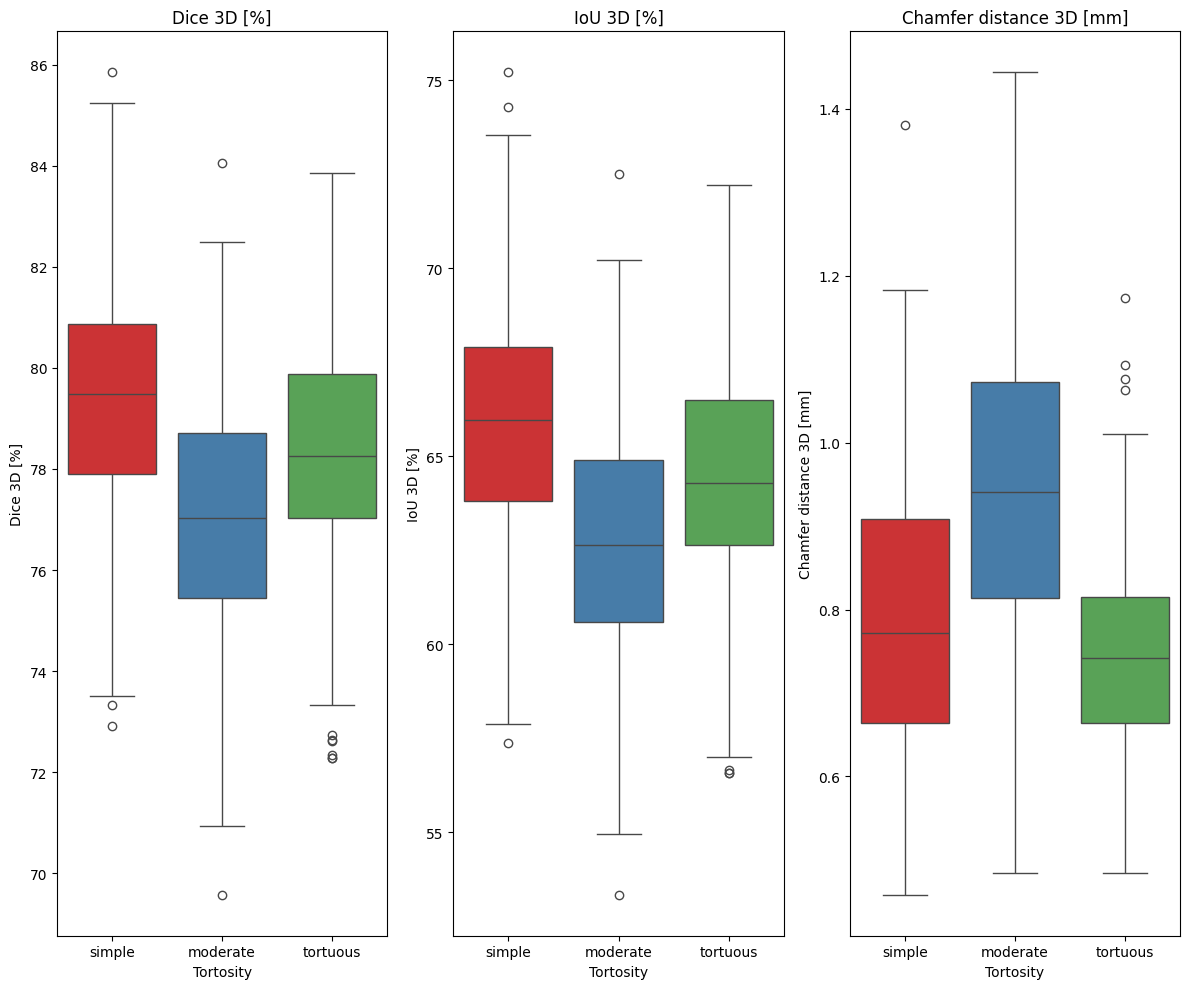

In [35]:
df_melted = pd.melt(df, id_vars=['tortosity'], value_vars=metrics,
                    var_name='Metric', value_name='Value')
plt.figure(figsize=(12, 10))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='tortosity', y='Value', data=df_melted[df_melted['Metric'] == metric], palette='Set1')
    plt.title(metric)
    plt.xlabel('Tortosity')
    plt.ylabel(metric)
plt.tight_layout()
plt.savefig('figures/boxplot_general.png')
plt.show()

In [38]:
for metric in metrics:
    print(f"{metric} CI 95%: {ci(df[metric])}")
print(f"DICE 2D: CI 95%: {ci(df['Avg Dice 2D [%]'])}")


Dice 3D [%] CI 95%: (np.float64(77.95532210366346), np.float64(78.38186830125431))
IoU 3D [%] CI 95%: (np.float64(63.95265574034316), np.float64(64.5256038335895))
Chamfer distance 3D [mm] CI 95%: (np.float64(0.8157166301495332), np.float64(0.8455951814697725))
DICE 2D: CI 95%: (np.float64(0.7852670209022996), np.float64(0.7870231322723751))


In [39]:

df = pd.read_csv("../data/general_clinical/experiment_results.csv")

df_tortuous = df[df['tortosity'] == 'tortuous']
df_moderate = df[df['tortosity'] == 'moderate']
df_simple = df[df['tortosity'] == 'simple']

metrics = ['Dice 3D [%]', 'IoU 3D [%]', 'Chamfer distance 3D [mm]']
df

,Unnamed: 0,vessel,tortosity,Time [s],Dice 3D [%],IoU 3D [%],Chamfer distance 3D [mm],Avg Dice 2D [%]
0,0,simple:0,simple,NaN,71.408250,55.530973,1.284853,0.738802
1,1,simple:1,simple,NaN,69.714286,53.508772,1.523305,0.726170
2,2,simple:2,simple,NaN,71.841705,56.057007,1.353597,0.720510
3,3,simple:3,simple,NaN,71.739130,55.932203,1.322833,0.721337
4,4,simple:4,simple,NaN,69.493844,53.249476,1.116253,0.725060
...,...,...,...,...,...,...,...,...
595,595,tortuous:195,tortuous,NaN,78.003120,63.938619,0.720883,0.746255
596,596,tortuous:196,tortuous,NaN,70.212766,54.098361,1.141239,0.737565
597,597,tortuous:197,tortuous,NaN,76.056338,61.363636,0.908298,0.731869
598,598,tortuous:198,tortuous,NaN,71.332436,55.439331,1.132256,0.738049


In [40]:
df.describe()

,Unnamed: 0,Time [s],Dice 3D [%],IoU 3D [%],Chamfer distance 3D [mm],Avg Dice 2D [%]
count,600.000000,0.0,600.000000,600.000000,600.000000,600.000000
mean,299.500000,NaN,75.246879,60.387529,0.999203,0.736552
std,173.349358,NaN,2.626163,3.374912,0.215145,0.011771
min,0.000000,NaN,67.371601,50.797267,0.573027,0.703687
25%,149.750000,NaN,73.487829,58.087558,0.837487,0.728353
50%,299.500000,NaN,75.268817,60.344828,0.962706,0.735859
75%,449.250000,NaN,77.019639,62.627592,1.123598,0.743694
max,599.000000,NaN,82.530120,70.256410,1.745788,0.775896


In [41]:
for metric in metrics:
    print(f"{metric} CI 95%: {ci(df[metric])}")
print(f"DICE 2D: CI 95%: {ci(df['Avg Dice 2D [%]'])}")


Dice 3D [%] CI 95%: (np.float64(75.0363206996757), np.float64(75.45743743872451))
IoU 3D [%] CI 95%: (np.float64(60.11693770537224), np.float64(60.65811970553183))
Chamfer distance 3D [mm] CI 95%: (np.float64(0.9819532198621489), np.float64(1.016452629732621))
DICE 2D: CI 95%: (np.float64(0.7356084168533722), np.float64(0.7374959302874237))
